# K-Means

![Alt Text](image.gif)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [2]:
# Generate a random dataset with added noise
n_samples = 300
X, y = make_blobs(n_samples=n_samples, centers=4, cluster_std=1.0, 
                  random_state=42)


In [3]:
X

array([[ -9.29768866,   6.47367855],
       [ -9.69874112,   6.93896737],
       [ -1.68665271,   7.79344248],
       [ -7.09730839,  -5.78133274],
       [-10.87645229,   6.3154366 ],
       [ -6.02196757,  -7.04004812],
       [  4.81305976,   2.35848706],
       [ -6.46669574,  -7.44383415],
       [ -2.98837186,   8.82862715],
       [  3.44857534,   2.62972329],
       [ -3.11090424,  10.86656431],
       [  4.99689432,   1.28026009],
       [ -2.30033403,   7.054616  ],
       [ -3.92456837,   8.59364081],
       [ -9.48897033,   6.83639753],
       [ -3.21125072,   8.68662398],
       [-10.46587019,   7.37160786],
       [  2.61473625,   2.159624  ],
       [ -2.41212007,   9.98293112],
       [ -1.92234053,  11.20474175],
       [  5.79847442,   1.15248737],
       [ -2.67048333,   9.41833699],
       [ -5.90450746,  -7.02716697],
       [ -8.95065581,   7.10255332],
       [ -2.97261532,   8.54855637],
       [ -8.30852358,   8.76509154],
       [ -9.41509909,   8.07891414],
 

In [4]:
# Add noise to the dataset
noise_factor = 1.0

#This line of code combines the original dataset X with additional random noise to 
#create a new dataset X_noise. The noise is generated from a normal distribution 
#with a mean of 0 and a standard deviation specified by the noise_factor. 
#The np.concatenate function is used to stack these two datasets vertically, 
#resulting in a dataset that includes both the original data and the introduced noise. 
#This is done to simulate a noisy dataset for testing how the K-means clustering algorithm 
#handles outliers or noisy points.
X_noise = np.concatenate([X, np.random.normal
                          (0, noise_factor,size=(n_samples // 10, 2))])

In [5]:
X_noise

array([[ -9.29768866,   6.47367855],
       [ -9.69874112,   6.93896737],
       [ -1.68665271,   7.79344248],
       [ -7.09730839,  -5.78133274],
       [-10.87645229,   6.3154366 ],
       [ -6.02196757,  -7.04004812],
       [  4.81305976,   2.35848706],
       [ -6.46669574,  -7.44383415],
       [ -2.98837186,   8.82862715],
       [  3.44857534,   2.62972329],
       [ -3.11090424,  10.86656431],
       [  4.99689432,   1.28026009],
       [ -2.30033403,   7.054616  ],
       [ -3.92456837,   8.59364081],
       [ -9.48897033,   6.83639753],
       [ -3.21125072,   8.68662398],
       [-10.46587019,   7.37160786],
       [  2.61473625,   2.159624  ],
       [ -2.41212007,   9.98293112],
       [ -1.92234053,  11.20474175],
       [  5.79847442,   1.15248737],
       [ -2.67048333,   9.41833699],
       [ -5.90450746,  -7.02716697],
       [ -8.95065581,   7.10255332],
       [ -2.97261532,   8.54855637],
       [ -8.30852358,   8.76509154],
       [ -9.41509909,   8.07891414],
 

In [6]:
# Find the optimal number of clusters using the elbow method
inertia_values = []
possible_k_values = range(1, 11)#[1,2,3,4,5,6,7,8,9,10]

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # architecture of the model
    kmeans.fit(X_noise) #training the model
    inertia_values.append(kmeans.inertia_)

WCSS, which stands for Within-Cluster Sum of Squares, is a metric used in k-means clustering to evaluate the compactness of clusters. It quantifies how close the data points within a cluster are to the centroid of that cluster. The lower the WCSS, the more compact and homogeneous the clusters are.

Here's a brief description of WCSS:

1. **Definition:**
   - WCSS is the sum of squared distances between each data point within a cluster and the centroid of that cluster.
   - It is calculated separately for each cluster and then summed across all clusters.

2. **Mathematical Formulation:**
   - For a given cluster \(C_i\), WCSS is calculated as the sum of squared Euclidean distances (\(d^2\)) between each data point (\(x_j\)) in the cluster and the centroid (\(c_i\)):
     \[ \text{WCSS}(C_i) = \sum_{j \in C_i} d(x_j, c_i)^2 \]
   - The total WCSS for all clusters is the sum of WCSS values for each individual cluster.

3. **Objective in K-Means:**
   - In the context of k-means clustering, the goal is to minimize the WCSS by adjusting the positions of cluster centroids.
   - The k-means algorithm achieves this by iteratively assigning data points to clusters and updating centroids until convergence.

4. **Choosing the Number of Clusters (K):**
   - WCSS is often used to evaluate the quality of clustering solutions for different values of K (number of clusters).
   - The "elbow method" involves plotting the WCSS for various values of K and selecting the point where the rate of decrease in WCSS slows down (forming an "elbow") as the optimal K.



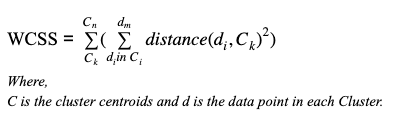

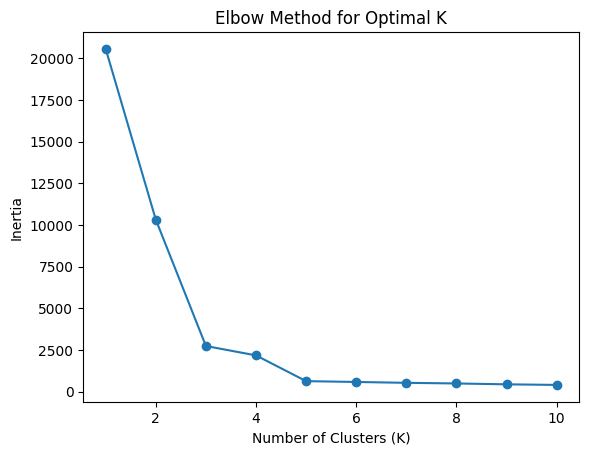

In [7]:

# Plot the elbow curve
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [13]:
# Choose the optimal K based on the elbow point
optimal_k = 5  # Adjust based on the visual inspection of the elbow plot

# Initialize KMeans model with optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

# Fit the model to the noisy data
kmeans_optimal.fit(X_noise)

# Get the cluster assignments and centroids
labels_optimal = kmeans_optimal.labels_
centroids_optimal = kmeans_optimal.cluster_centers_

In [14]:
centroids_optimal

array([[-8.87357218,  7.17458342],
       [ 0.08798942,  0.08855758],
       [-6.83235205, -6.83045748],
       [ 4.76306427,  2.05656723],
       [-2.70981136,  8.97143336]])

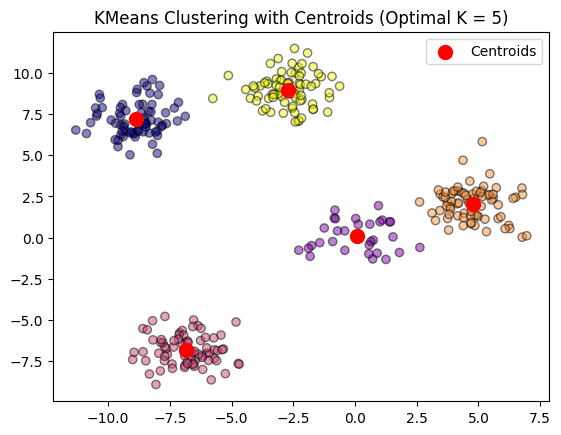

In [17]:
# Plot the data points and centroids
plt.scatter(X_noise[:, 0], X_noise[:, 1], 
            c=labels_optimal, cmap='plasma', alpha=0.5, edgecolors='k')

plt.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], 
            c='red', marker='o', s=100, label='Centroids')

plt.title(f'KMeans Clustering with Centroids (Optimal K = {optimal_k})')
plt.legend()
plt.show()


In [18]:

# Calculate Silhouette Score for optimal K
silhouette_avg_optimal = silhouette_score(X_noise, labels_optimal)
print(f"Silhouette Score (Optimal K): {silhouette_avg_optimal}")

Silhouette Score (Optimal K): 0.7264893682609301


The silhouette score is a metric used to measure the quality of clustering in a dataset. It provides a way to assess how well-separated the clusters are. The silhouette score ranges from -1 to 1, where a high value indicates well-defined clusters, and a low value suggests overlapping clusters. Here's a brief interpretation of silhouette scores:

1. **Silhouette Score Range:**
   - **Near +1:** Indicates that the sample is far away from the neighboring clusters. This is a good sign that the point is well matched to its own cluster.
   - **Near 0:** Indicates that the sample is on or very close to the decision boundary between two neighboring clusters. It could be on the edge of one cluster and may be better suited to another.
   - **Near -1:** Indicates that those samples might have been assigned to the wrong cluster.

2. **Interpretation:**
   - **High Silhouette Score (Close to 1):** Indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. It suggests a good, well-defined clustering.
   - **Low Silhouette Score (Close to -1 or 0):** Indicates overlapping clusters or that the object could be assigned to a different cluster.

3. **Overall Assessment:**
   - **Closer to +1:** Better-defined and well-separated clusters.
   - **Around 0:** Overlapping clusters or clusters with ambiguous boundaries.
   - **Closer to -1:** Indicates potential issues with clustering, and points might have been assigned to the wrong clusters.

4. **Usage:**
   - Use the silhouette score to compare different clustering results with varying numbers of clusters (K). Choose the number of clusters that gives the highest silhouette score.
   - A higher silhouette score suggests more appropriate cluster assignments.

Keep in mind that while the silhouette score is a useful metric, it should not be the sole criterion for evaluating clustering performance. It is often used in conjunction with visual inspection and domain knowledge to make informed decisions about the quality of the clustering results.

In [12]:
labels_optimal

array([0, 0, 0, 2, 0, 2, 3, 2, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       2, 0, 0, 0, 0, 2, 2, 3, 0, 3, 0, 3, 0, 0, 0, 2, 0, 2, 3, 0, 0, 2,
       0, 0, 0, 3, 0, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 0, 0, 3, 3, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 3, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 0,
       3, 0, 0, 0, 0, 3, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 3, 3, 0, 0, 2, 0, 3, 2, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 2,
       0, 3, 2, 0, 0, 3, 0, 0, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0, 2, 3, 3, 2,
       2, 3, 3, 2, 0, 0, 0, 3, 3, 0, 2, 0, 1, 3, 2, 2, 2, 0, 3, 2, 2, 3,
       3, 0, 0, 0, 2, 3, 0, 2, 2, 0, 2, 0, 0, 2, 2, 3, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 3, 3, 0, 0, 3, 3, 3, 0, 0, 2, 3, 2, 0, 3, 0, 0, 0, 2,
       2, 3, 0, 2, 2, 2, 0, 2, 0, 2, 0, 3, 2, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       2, 3, 2, 3, 3, 0, 0, 2, 3, 3, 0, 0, 2, 0, 0, 3, 3, 3, 3, 2, 0, 3,
       2, 3, 3, 2, 0, 2, 3, 0, 0, 0, 3, 0, 0, 0, 1,